# Loading in and plotting met station data (Mesa West) from Google Drive

In [1]:
%%capture
!pip install git+https://github.com/friedrichknuth/driveanon.git
    
import driveanon

In [15]:
blob_id = '1YT9bNveID55Lo5j4upMGrA7vEl5FWXp_' #blob_id of the mesa west met file, .csv version
#for blob_id in file_blob_ids:
f = driveanon.save(blob_id)
f

'MW-V7_clean.csv'

## The file should now be in your working directory

In [68]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#load in csv file
df = pd.read_csv('./'+f)

#converts any NAN text to NaN and numeric columns (fixes error raised)
for (columnName, columnData) in df.iteritems():
    df[columnName] = pd.to_numeric(df[columnName],errors='coerce')
    
df.head(10)

/srv/conda/envs/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,DOY,Month,Day,Hour,Minute,Decimal_Year,Flag,AirTC_10ft_Avg_C,RH_10ft_%,...,TCstringC_250cm_Avg,TCstringC_275cm_Avg,TCstringC_300cm_Avg,SM_5cm_Avg,TC_5cm_Avg_C,SM_20cm_Avg_vv,TC_20cm_Avg_C,SM_50cm_Avg_vv,TC_50cm_Avg_C,SnowDepth_m
0,2016,283,10,9,21,10,2016.772892,0,NaN,NaN,...,8.80,8.840,9.10,0.1400,7.746,0.247,5.543,0.311,6.930,NaN
1,2016,283,10,9,21,20,2016.772911,0,NaN,NaN,...,8.81,8.960,9.24,0.1400,8.030,0.247,5.652,0.309,7.061,NaN
2,2016,283,10,9,21,30,2016.772930,0,NaN,NaN,...,8.80,8.950,9.41,0.1390,8.190,0.245,5.739,0.306,7.120,NaN
3,2016,283,10,9,21,40,2016.772949,0,NaN,NaN,...,8.32,8.470,8.86,0.1370,8.320,0.244,5.800,0.305,7.198,NaN
4,2016,283,10,9,21,50,2016.772968,0,NaN,57.15,...,8.66,8.850,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,283,10,9,22,0,2016.772987,0,8.70,55.11,...,9.17,9.410,10.05,0.1370,8.490,0.244,5.900,0.306,7.200,0.050106
6,2016,283,10,9,22,10,2016.773006,1,9.22,55.41,...,10.10,10.345,11.07,0.1385,8.580,0.244,5.950,0.306,7.204,0.029106
7,2016,283,10,9,22,20,2016.773025,0,9.74,55.71,...,11.03,11.280,12.09,0.1400,8.670,0.244,6.000,0.306,7.208,0.008106
8,2016,283,10,9,22,30,2016.773044,0,9.26,56.55,...,10.28,10.530,11.15,0.1400,8.810,0.244,6.000,0.305,7.217,0.009106
9,2016,283,10,9,22,40,2016.773063,0,8.69,57.76,...,8.72,8.760,9.48,0.1410,8.900,0.244,6.073,0.305,7.224,0.009106


In [69]:
#create and add datetime column
full_dates = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=df['Day'], hour = df['Hour'], minute = df['Minute']))
df.insert(7, 'Datetime_UTC', full_dates)

df.head()

,Year,DOY,Month,Day,Hour,Minute,Decimal_Year,Datetime_UTC,Flag,AirTC_10ft_Avg_C,...,TCstringC_250cm_Avg,TCstringC_275cm_Avg,TCstringC_300cm_Avg,SM_5cm_Avg,TC_5cm_Avg_C,SM_20cm_Avg_vv,TC_20cm_Avg_C,SM_50cm_Avg_vv,TC_50cm_Avg_C,SnowDepth_m
0,2016,283,10,9,21,10,2016.772892,2016-10-09 21:10:00,0,NaN,...,8.80,8.84,9.10,0.140,7.746,0.247,5.543,0.311,6.930,NaN
1,2016,283,10,9,21,20,2016.772911,2016-10-09 21:20:00,0,NaN,...,8.81,8.96,9.24,0.140,8.030,0.247,5.652,0.309,7.061,NaN
2,2016,283,10,9,21,30,2016.772930,2016-10-09 21:30:00,0,NaN,...,8.80,8.95,9.41,0.139,8.190,0.245,5.739,0.306,7.120,NaN
3,2016,283,10,9,21,40,2016.772949,2016-10-09 21:40:00,0,NaN,...,8.32,8.47,8.86,0.137,8.320,0.244,5.800,0.305,7.198,NaN
4,2016,283,10,9,21,50,2016.772968,2016-10-09 21:50:00,0,NaN,...,8.66,8.85,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#check data types to verify
df.dtypes

Year                              int64
DOY                               int64
Month                             int64
Day                               int64
Hour                              int64
Minute                            int64
Decimal_Year                    float64
Datetime_UTC             datetime64[ns]
Flag                              int64
AirTC_10ft_Avg_C                float64
RH_10ft_%                       float64
AirTC_20ft_Avg_C                float64
RH_20ft_%                       float64
WSms_10ft_Avg                   float64
WindDir_10ft_deg                float64
WSms_20ft_Avg                   float64
WindDir_20ft_deg                float64
SUp_Avg_Wm2                     float64
SDn_Avg_Wm2                     float64
LUpCo_Avg_Wm2                   float64
LDnCo_Avg_Wm2                   float64
TCDT_Avg_C                      float64
IRtarget_nadir1_C_Avg           float64
IRtarget_nadir2_C_Avg           float64
IRtarget_30degN_C_Avg           float64


In [71]:
#latitude and longitude of site
MW_lat = 39.03388
MW_lon = -108.21399

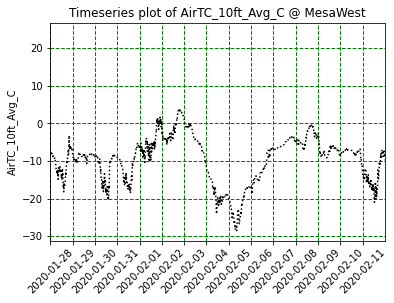

In [88]:
#plotting air temperature at 10ft above ground
#df_partial = df[['Decimal_Year','AirTC_10ft_Avg_C']]
#df_partial.plot(style='k.')
variable = 'AirTC_10ft_Avg_C'
IOP = 1 #if IOP = 1, will focus in on IOP period
# plot the index for the x-values
plt.plot(df['Datetime_UTC'], df[variable], color='k',linestyle = ':') 
plt.grid(color='g', linestyle='--', linewidth=1)
#plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel(variable) 
plt.title('Timeseries plot of ' + variable + ' @ MesaWest')
if IOP == 1:
    d1 = datetime.datetime(year=2020,month=1,day=28)
    d2 = datetime.datetime(year=2020,month=2,day=12)
    delta = d2 - d1
    plt.xlim(d1,d2)
    date_list = [d1 + datetime.timedelta(days=x) for x in range(delta.days)]
    datestr_list = [date_i.strftime('%Y-%m-%d') for date_i in date_list]
    plt.xticks(ticks=date_list, labels=datestr_list)
plt.show()